# LeNet

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 6000 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.


In [5]:
Classifier=Sequential()
Classifier.add(Conv2D(filters=6, input_shape=(224,224,3), kernel_size=(5,5), strides=(1,1), padding='valid'))
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Classifier.add(Conv2D(filters=16, input_shape=(228,228,3), kernel_size=(5,5), strides=(1,1), padding='valid'))
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Classifier.add(Conv2D(filters=120, input_shape=(228,228,3), kernel_size=(5,5), strides=(1,1), padding='valid'))
Classifier.add(Activation('relu'))
Classifier.add(Flatten())
Classifier.add(Dense(84, activation='relu'))
Classifier.add(Dense(12, activation='softmax'))
Classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
callbacks = [ModelCheckpoint("LeNet.h5", monitor='accuracy', verbose=1, save_best_only=True)]

In [7]:
epochs = 20
batch_size = 32

In [8]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/20
187/187 [==============================] - 295s 2s/step - loss: 1.9043 - accuracy: 0.3884 - val_loss: 0.9984 - val_accuracy: 0.6706

Epoch 00001: accuracy improved from -inf to 0.38840, saving model to LeNet.h5
Epoch 2/20
187/187 [==============================] - 285s 2s/step - loss: 1.1085 - accuracy: 0.6173 - val_loss: 0.8443 - val_accuracy: 0.7272

Epoch 00002: accuracy improved from 0.38840 to 0.61729, saving model to LeNet.h5
Epoch 3/20
187/187 [==============================] - 286s 2s/step - loss: 0.9928 - accuracy: 0.6573 - val_loss: 0.7127 - val_accuracy: 0.7576

Epoch 00003: accuracy improved from 0.61729 to 0.65734, saving model to LeNet.h5
Epoch 4/20
187/187 [==============================] - 335s 2s/step - loss: 0.8779 - accuracy: 0.7001 - val_loss: 0.6614 - val_accuracy: 0.7931

Epoch 00004: accuracy improved from 0.65734 to 0.70007, saving model to LeNet.h5
Epoch 5/20
187/187 [==============================] - 319s 2s/step - loss: 0.8031 - accuracy: 0.7272 - 

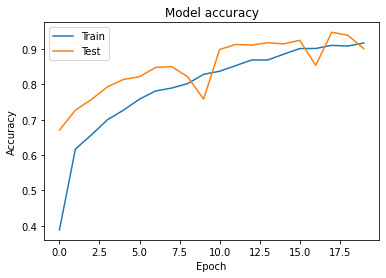

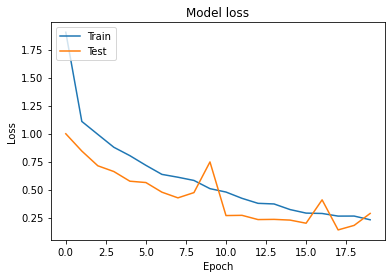

In [9]:
def plot():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot()

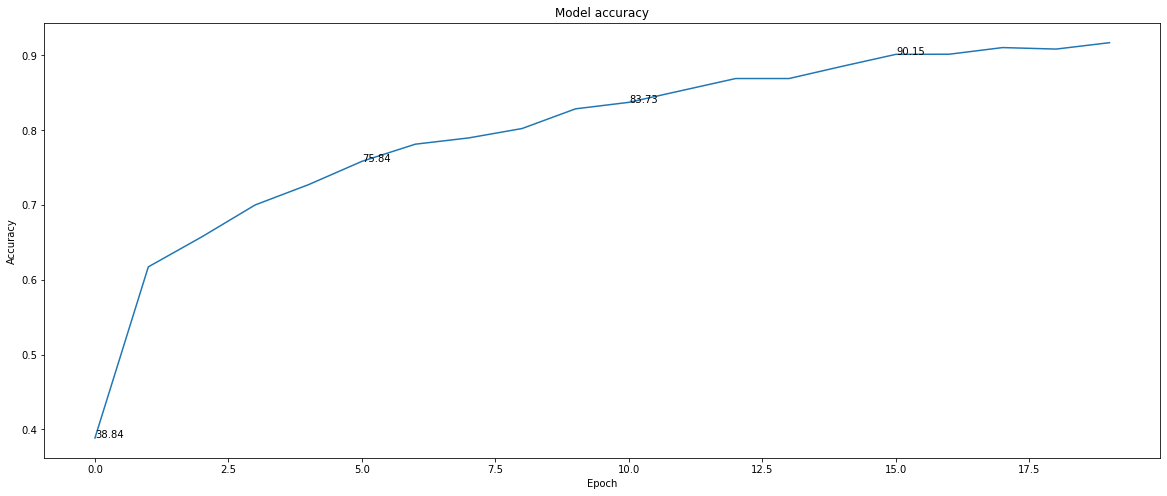

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

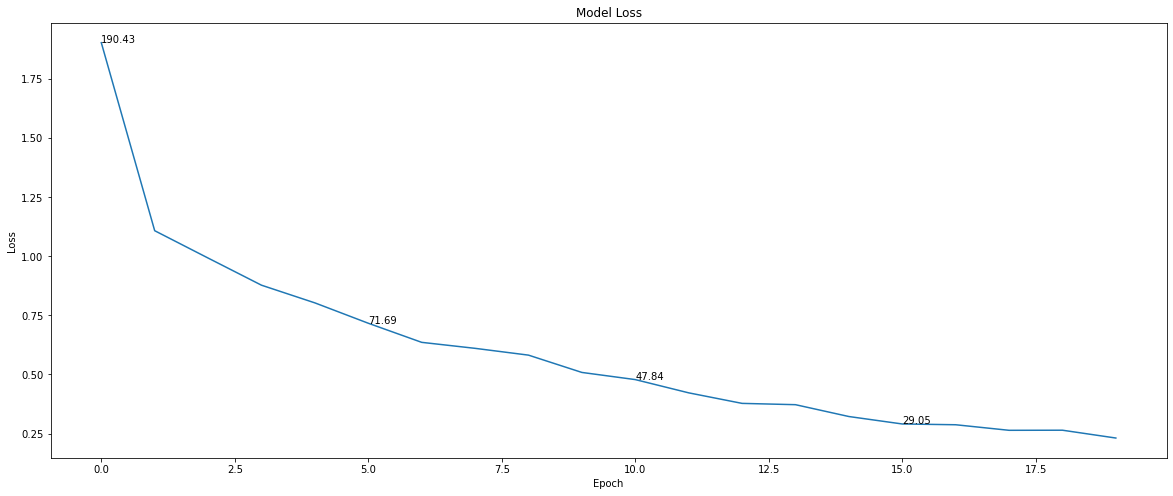

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()